# Capstone Project Mumbai using Foursquare API

#### Importing libraries 

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import csv

#### Setting maxcolwidth to 800 for good viewability

In [2]:
pd.set_option('max_colwidth', 800)

#### Getting the source webpage and assigining the variable source to it and iniatilizing the beautifulsoup object to soup

In [3]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai').text 
soup = BeautifulSoup(source, 'lxml')

#### Initializing the csv_writer object and writing the name of the columns on it as the first row

In [4]:
csv_file = open('mumbai.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighborhood'])

14

#### Scraping the page to extracting the list of neighbourhoods in Mumbai

In [5]:
mwcg = soup.find_all(class_ = "mw-headline")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file 

#### Closing the csv file

In [6]:
csv_file.close()

#### Creating the pandas dataframe

In [7]:
df = pd.read_csv('mumbai.csv')

In [8]:
df = df.replace('Kandivali west (page does not exist)','Kandivali West')
df = df.replace('Kandivali east (page does not exist)','Kandivali East')

#### Google Maps Geocoding API credentials

In [9]:
# The code was removed by Watson Studio for sharing.

#### Using the Google Maps Geocoding API

In [10]:
df['Latitude'] = None # Initializing the latitude array
df['Longitude'] = None# Initializing the longitude array

for i in range(0,len(df),1):
    results = geocoder.geocode(df.iat[i,0] + ",Mumbai,India")
    try:
        lat = results[0]['geometry']['lat'] # Extracts the latitude value
        lng = results[0]['geometry']['lng']
        df.iat[i,df.columns.get_loc('Latitude')] =lat
        df.iat[i,df.columns.get_loc('Longitude')] =lng
    except:
        lat = None
        lng = None

#### Judging the performance of the API using the number of collisions

In [11]:
col = 0
explored_lat_lng = []
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    if (lat, lng) in explored_lat_lng:
        col = col + 1
    else:
        explored_lat_lng.append((lat, lng))

print("Collisions : ", col)

Collisions :  0


#### Import necessary Libraries 

In [12]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

#### Geographic Data for Mumbai
Pulling data from foursquare

In [14]:
address = 'Mumbai, India'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 18.9387711, 72.8353355.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


#### Creating a folium map of Mumbai

In [15]:
# Creates map of Mumbai using latitude and longitude values
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)  
    
map_mumbai

#### Defining own function to get the name of the category

In [16]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Foursquare API Usage
##### 1) Accessing Foursquare API

In [17]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: Z4OGKH0MI2SMYXWJIZC0SWNA24OWZSUIK2TFBKMA4H1FBHM1
CLIENT_SECRET:PWN4KXID1TQEMI05HEGS1G5ADNITBFPOUNWIND43G0310VEF


##### 2) Using the FourSquare API on all neighbourhoods

In [18]:
explore_df_list = []

for i, nbd_name in enumerate(df['Neighborhood']):  
    
    try :
        ### Getting the data of neighborhood
        nbd_name = df.loc[i, 'Neighborhood']
        nbd_lat = df.loc[i, 'Latitude']
        nbd_lng = df.loc[i, 'Longitude']

        radius = 1000 # Setting the radius as 1000 metres
        LIMIT = 30 # Getting the top 30 venues

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nbd_lat, nbd_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flattens JSON

        # Filtering the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Renaming the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Gets the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Gets the data required
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nbd_name, nbd_lat, nbd_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

#### Creating a dataframe for performing clustering operations

In [19]:
explore_df = pd.DataFrame([item for item in explore_df_list])
explore_df.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Andheri,19.119698,72.84642,Merwans Cake shop,Bakery,19.119300,72.845418
1,Andheri,19.119698,72.84642,Narayan Sandwich,Sandwich Place,19.121398,72.850270
2,Andheri,19.119698,72.84642,Radha Krishna Veg Restaurant,Indian Restaurant,19.115130,72.843060
3,Andheri,19.119698,72.84642,McDonald's,Fast Food Restaurant,19.119691,72.846102
4,Andheri,19.119698,72.84642,Shawarma Factory,Falafel Restaurant,19.124591,72.840398


In [20]:
explore_df.shape

(882, 7)

#### Performing one-hot encoding to analyze neighborhoods

In [21]:
# One hot encoding
mumbai_onehot = pd.get_dummies(explore_df[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
mumbai_onehot['Neighborhood'] = explore_df['Neighborhood'] 

# Move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + mumbai_onehot.columns[:-1].values.tolist()
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

,Zoo,American Restaurant,Antique Shop,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Café,Camera Store,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Coworking Space,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,History Museum,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,Nightclub,North Indian Restaurant,Opera House,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Resort,Restaurant,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Aggregating venues by neighborhoods

In [22]:
mumbai_grouped = mumbai_onehot.groupby('Neighborhood').mean().reset_index()
mumbai_grouped.head()

,Neighborhood,Zoo,American Restaurant,Antique Shop,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Café,Camera Store,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Coworking Space,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,History Museum,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Nightclub,North Indian Restaurant,Opera House,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Resort,Restaurant,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,Andheri,0.0,0.0,0.0,0.00,0.0,0.000000,0.037037,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.037037,0.0,0.074074,0.037037,0.0,0.037037,0.0,0.0,0.037037,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.037037,0.0,0.000000,0.00,0.0,0.0,0.037037,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.037037,0.000000,0.074074,0.185185,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.000000,0.00,0.037037,0.074074,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.037037,0.0,0.0
1,Antop Hill,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.111111,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.0,0.111111,0.0,0.0,0.0,0.00,0.000000,0.111111,0.000000,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.111111,0.0,0.000000,0.000000,0.0,0.0
2,Bandra,0.0,0.0,0.0,0.00,0.0,0.033333,0.000000,0.033333,0.000000,0.033333,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.066667,0.000000,0.0,0.000000,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.033333,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.033333,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0000

#### Creating a function to return the most common venues

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Creating a new dataframe to get the top 10 venues

In [24]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mumbai_grouped['Neighborhood']

for ind in np.arange(mumbai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andheri,Indian Restaurant,Fast Food Restaurant,Café,Ice Cream Shop,Sandwich Place,Camera Store,Falafel Restaurant,Coffee Shop,Pizza Place,Burger Joint
1,Antop Hill,IT Services,Gym / Fitness Center,Pizza Place,Coffee Shop,Fast Food Restaurant,Gift Shop,Bookstore,Trail,Indian Restaurant,Gym
2,Bandra,Indian Restaurant,Snack Place,Gourmet Shop,Café,Seafood Restaurant,Park,Indie Movie Theater,Food Truck,Korean Restaurant,Lounge
3,Bhandup,Indian Restaurant,Train Station,Shopping Mall,Bookstore,Chinese Restaurant,Fried Chicken Joint,Big Box Store,Fast Food Restaurant,Pizza Place,Sports Bar
4,Bhayandar,Hot Dog Joint,Diner,Resort,Dance Studio,Dessert Shop,Design Studio,Donut Shop,Electronics Store,Department Store,Food & Drink Shop


#### Setting the dataframe for k-means clustering to operate on

In [25]:
mumbai_grouped_clustering = mumbai_grouped.drop('Neighborhood', 1)

#### Using K-Means clustering

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [27]:
max_range = 20 # Maximum range of clusters

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kgc = mumbai_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kgc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kgc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

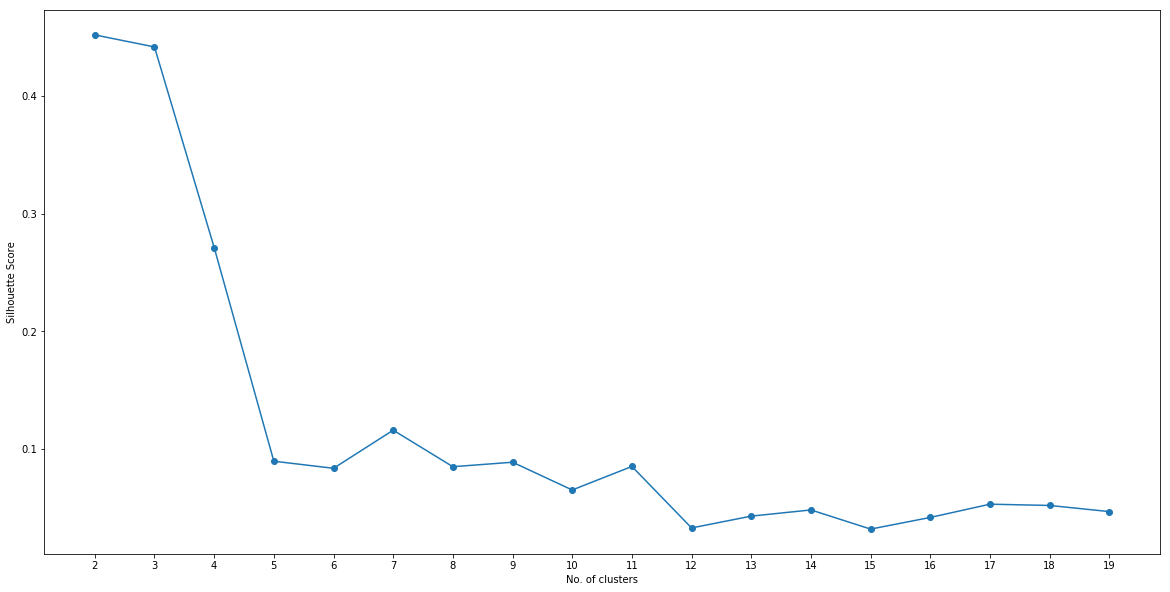

In [28]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

#### From the graph the optimal number is found out to be considered for our clustering

In [29]:
opt = np.argmax(scores) + 6 # Finds the optimal value
opt

6

#### K-Means clustering for the optimal number of clusters

In [30]:
kclusters = opt

# Run k-means clustering
mgc = mumbai_grouped_clustering
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit(mgc)

In [31]:
# Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#### Creating a grand dataframe containing the necessary data

In [32]:
mumbai_merged = df
mumbai_merged = mumbai_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
mumbai_merged.dropna(inplace = True)
mumbai_merged['Cluster Labels'] = mumbai_merged['Cluster Labels'].astype(int)
mumbai_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andheri,19.1197,72.8464,0,Indian Restaurant,Fast Food Restaurant,Café,Ice Cream Shop,Sandwich Place,Camera Store,Falafel Restaurant,Coffee Shop,Pizza Place,Burger Joint
1,Bhayandar,19.1972,72.8114,5,Hot Dog Joint,Diner,Resort,Dance Studio,Dessert Shop,Design Studio,Donut Shop,Electronics Store,Department Store,Food & Drink Shop
2,Bandra,19.055,72.8402,0,Indian Restaurant,Snack Place,Gourmet Shop,Café,Seafood Restaurant,Park,Indie Movie Theater,Food Truck,Korean Restaurant,Lounge
3,Borivali,19.2291,72.8574,0,Ice Cream Shop,Chinese Restaurant,Indian Restaurant,Clothing Store,Park,Pizza Place,Scenic Lookout,Sandwich Place,Restaurant,Café
4,Dahisar,19.2572,72.8575,0,Indian Restaurant,Fast Food Restaurant,Department Store,Café,Coffee Shop,BBQ Joint,Soccer Field,Gym,Restaurant,Sandwich Place
5,Goregaon,19.1648,72.85,0,Indian Restaurant,Fast Food Restaurant,Snack Place,Design Studio,Indie Movie Theater,Restaurant,Sandwich Place,Seafood Restaurant,Lounge,Bookstore
6,Jogeshwari,19.1349,72.8488,0,Ice Cream Shop,Indian Restaurant,Coffee Shop,Mughlai Restaurant,Fast Food Restaurant,Smoke Shop,Sandwich Place,Asian Restaurant,Pharmacy,Pizza Place
7,Juhu,19.107,72.8275,0,Hotel,Café,Chinese Restaurant,Lounge,Seafood Restaurant,Cocktail Bar,Bar,Indian Restaurant,Spanish Restaurant,Restaurant
8,Kandivali West,19.2084,72.8422,0,Electronics Store,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Coffee Shop,Gym / Fitness Center,Food,Snack Place,Restaurant,Chinese Restaurant
9,Kandivali East,19.2102,72.8649,0,Pizza Place,Fast Food Restaurant,Indian Restaurant,Lounge,Department Store,Restaurant,Café,Sports Bar,Multiplex,Chinese Restaurant


#### Visualizing the clusters

In [33]:
# Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Neighborhood'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [35]:
val = 1
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == (val - 1), mumbai_merged.columns[[0] + np.arange(4, mumbai_merged.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andheri,Indian Restaurant,Fast Food Restaurant,Café,Ice Cream Shop,Sandwich Place,Camera Store,Falafel Restaurant,Coffee Shop,Pizza Place,Burger Joint
2,Bandra,Indian Restaurant,Snack Place,Gourmet Shop,Café,Seafood Restaurant,Park,Indie Movie Theater,Food Truck,Korean Restaurant,Lounge
3,Borivali,Ice Cream Shop,Chinese Restaurant,Indian Restaurant,Clothing Store,Park,Pizza Place,Scenic Lookout,Sandwich Place,Restaurant,Café
4,Dahisar,Indian Restaurant,Fast Food Restaurant,Department Store,Café,Coffee Shop,BBQ Joint,Soccer Field,Gym,Restaurant,Sandwich Place
5,Goregaon,Indian Restaurant,Fast Food Restaurant,Snack Place,Design Studio,Indie Movie Theater,Restaurant,Sandwich Place,Seafood Restaurant,Lounge,Bookstore
6,Jogeshwari,Ice Cream Shop,Indian Restaurant,Coffee Shop,Mughlai Restaurant,Fast Food Restaurant,Smoke Shop,Sandwich Place,Asian Restaurant,Pharmacy,Pizza Place
7,Juhu,Hotel,Café,Chinese Restaurant,Lounge,Seafood Restaurant,Cocktail Bar,Bar,Indian Restaurant,Spanish Restaurant,Restaurant
8,Kandivali West,Electronics Store,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Coffee Shop,Gym / Fitness Center,Food,Snack Place,Restaurant,Chinese Restaurant
9,Kandivali East,Pizza Place,Fast Food Restaurant,Indian Restaurant,Lounge,Department Store,Restaurant,Café,Sports Bar,Multiplex,Chinese Restaurant
10,"Khar, Mumbai",Bar,Gym / Fitness Center,Ice Cream Shop,Pub,Café,Seafood Restaurant,Gym,Frozen Yogurt Shop,Fish & Chips Shop,Coffee Shop


Cluster 1

In [36]:
mumbai_merged.loc[mumbai_merged['Cluster Labels']==0]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andheri,19.1197,72.8464,0,Indian Restaurant,Fast Food Restaurant,Café,Ice Cream Shop,Sandwich Place,Camera Store,Falafel Restaurant,Coffee Shop,Pizza Place,Burger Joint
2,Bandra,19.055,72.8402,0,Indian Restaurant,Snack Place,Gourmet Shop,Café,Seafood Restaurant,Park,Indie Movie Theater,Food Truck,Korean Restaurant,Lounge
3,Borivali,19.2291,72.8574,0,Ice Cream Shop,Chinese Restaurant,Indian Restaurant,Clothing Store,Park,Pizza Place,Scenic Lookout,Sandwich Place,Restaurant,Café
4,Dahisar,19.2572,72.8575,0,Indian Restaurant,Fast Food Restaurant,Department Store,Café,Coffee Shop,BBQ Joint,Soccer Field,Gym,Restaurant,Sandwich Place
5,Goregaon,19.1648,72.85,0,Indian Restaurant,Fast Food Restaurant,Snack Place,Design Studio,Indie Movie Theater,Restaurant,Sandwich Place,Seafood Restaurant,Lounge,Bookstore
6,Jogeshwari,19.1349,72.8488,0,Ice Cream Shop,Indian Restaurant,Coffee Shop,Mughlai Restaurant,Fast Food Restaurant,Smoke Shop,Sandwich Place,Asian Restaurant,Pharmacy,Pizza Place
7,Juhu,19.107,72.8275,0,Hotel,Café,Chinese Restaurant,Lounge,Seafood Restaurant,Cocktail Bar,Bar,Indian Restaurant,Spanish Restaurant,Restaurant
8,Kandivali West,19.2084,72.8422,0,Electronics Store,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Coffee Shop,Gym / Fitness Center,Food,Snack Place,Restaurant,Chinese Restaurant
9,Kandivali East,19.2102,72.8649,0,Pizza Place,Fast Food Restaurant,Indian Restaurant,Lounge,Department Store,Restaurant,Café,Sports Bar,Multiplex,Chinese Restaurant
10,"Khar, Mumbai",19.0697,72.8399,0,Bar,Gym / Fitness Center,Ice Cream Shop,Pub,Café,Seafood Restaurant,Gym,Frozen Yogurt Shop,Fish & Chips Shop,Coffee Shop


Cluster 2

In [37]:
mumbai_merged.loc[mumbai_merged['Cluster Labels']==1]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Vasai,19.4304,72.8724,1,Ice Cream Shop,North Indian Restaurant,Sporting Goods Shop,Yoga Studio,Farmers Market,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant


Cluster 3

In [38]:
mumbai_merged.loc[mumbai_merged['Cluster Labels']==2]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Trombay,19.037,72.9464,2,Shop & Service,Concert Hall,Athletics & Sports,Yoga Studio,Farmers Market,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant


Cluster 4

In [39]:
mumbai_merged.loc[mumbai_merged['Cluster Labels']==3]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Virar,19.4677,72.888,3,Resort,Bus Station,Indian Restaurant,Restaurant,Yoga Studio,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [40]:
mumbai_merged.loc[mumbai_merged['Cluster Labels']==4]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Mankhurd,19.0485,72.9323,4,Train Station,Bus Station,Coffee Shop,Sports Bar,Yoga Studio,Farmers Market,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop


In [41]:
mumbai_merged.loc[mumbai_merged['Cluster Labels']==5]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bhayandar,19.1972,72.8114,5,Hot Dog Joint,Diner,Resort,Dance Studio,Dessert Shop,Design Studio,Donut Shop,Electronics Store,Department Store,Food & Drink Shop
